# NAME: MAYUR DILIP TAWARE  PGA17, PUNE
# PROJECT: AIRLINE PASSENGER SATISFACTION

In [1]:
## IMPORTING REQUIRED LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns                                                                                                       

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.width=None

#### READING THE DATASET

In [4]:
train = pd.read_csv(r"E:\CAPSTONE 1\train.csv")
test = pd.read_csv(r"E:\CAPSTONE 1\test.csv")

In [5]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
train = train.drop(['Unnamed: 0', 'id'], axis=1)

In [7]:
train.shape

(103904, 23)

In [164]:
test.shape

(25976, 21)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [9]:
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [11]:
## DROPPING UNNECESSARY COLUMNS
test = test.drop(['Unnamed: 0', 'id'], axis=1)

##### CHECKING FOR NULLS

In [12]:
train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [13]:
test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [14]:
train['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [15]:
train['Arrival Delay in Minutes'].fillna(15.0, inplace = True)

###### FILLING THE MEAN TIME IN PLACE OF NULL VALUES

In [16]:
test['Arrival Delay in Minutes'].describe()

count    25893.000000
mean        14.740857
std         37.517539
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1115.000000
Name: Arrival Delay in Minutes, dtype: float64

In [17]:
test['Arrival Delay in Minutes'].fillna(15.0, inplace = True)

###### FILLING THE MEAN TIME IN PLACE OF NULL VALUES

In [18]:
train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [19]:
test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Gender', ylabel='count'>

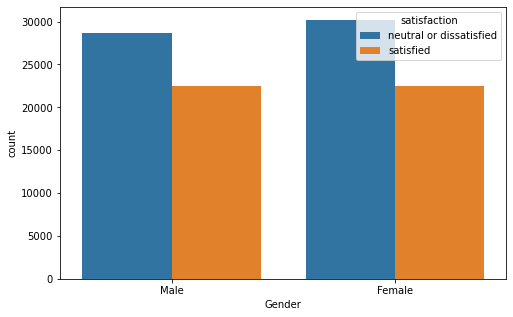

In [20]:
plt.figure(figsize = (8, 5))
sns.countplot('Gender', data=train, hue='satisfaction')

###### GENDER WISE DISTRIBUTION OF SATISFIED AND DISSATISFIED PASSENGERS IS ALMOST SAME. MAINLY IN BOTH, NUMBER OF DISSATISFIED PASSENGERS IS MORE. SO, BASICALLY GENDER DOES NOT HAVE IMPACT ON PASSENGER SATISFACTION.

###### SO, I WILL DROP GENDER COLUMN

In [21]:
train = train.drop(['Gender'], axis=1)
test = test.drop(['Gender'], axis=1)

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

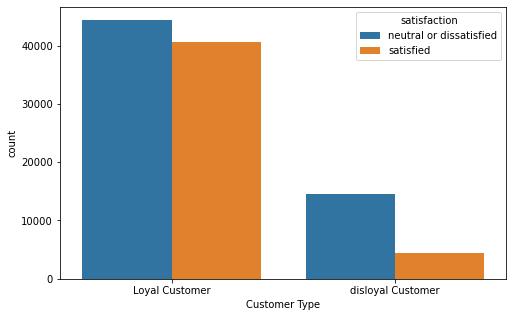

In [22]:
plt.figure(figsize = (8, 5))
sns.countplot('Customer Type', data=train, hue='satisfaction')

###### WE CAN SEE THAT THE NUMBER OF LOYAL CUSTOMERS ARE MORE AS COMPARED TO DISLOYAL CUSTOMERS AND IN BOTH CASES THE COUNT OF DISSATISFIED CUSTOMERS IS MORE. 

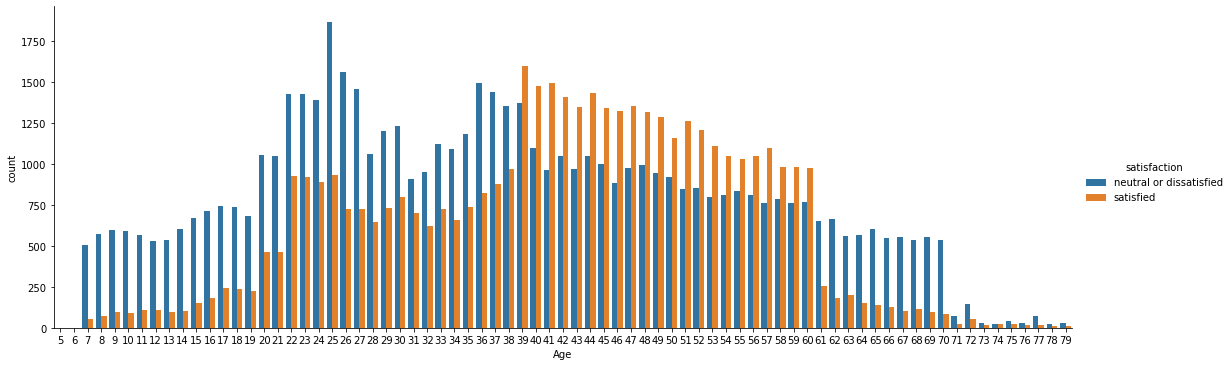

In [23]:
sns.catplot("Age", data = train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))

###### PASSENGERS WITH AGE 7-38 AND 61-80 ARE HUGELY DISSATISFIED AS COMPARED TO SATISFIED WHILE PASSENGERS WITH AGE 38-60 ARE MORE SATISFIED AS COMPARED TO DISSATISFIED PASSENGERS 

<Figure size 576x360 with 0 Axes>

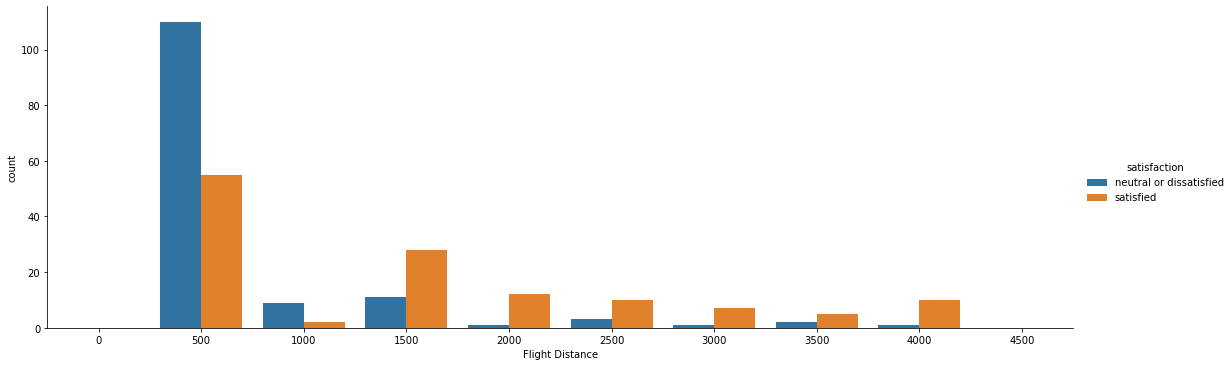

In [24]:
plt.figure(figsize = (8, 5))
sns.catplot('Flight Distance', data = train, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 5000, 500))

###### MOSTLY THE PASSENGERS TEND TO TRAVEL IN THE RANGE OF 500 MILES AND IN THAT RANGE MOSTLY ARE DISSATISFIED.

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

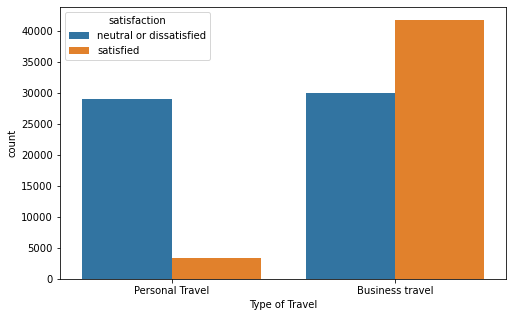

In [25]:
plt.figure(figsize = (8, 5))
sns.countplot('Type of Travel', data=train, hue='satisfaction')

###### PASSENGERS WHO TRAVEL FOR PERSONAL REASONS ARE MOSTLY DISSATISFIED WHILE THE PASSENGERS DOING TRAVEL FOR BUSINESS ARE MOSTLY SATISFIED.

<AxesSubplot:xlabel='Class', ylabel='count'>

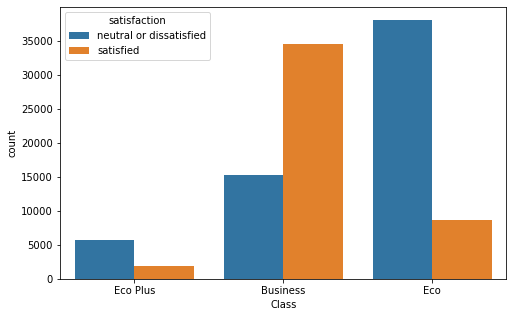

In [26]:
plt.figure(figsize = (8, 5))
sns.countplot('Class', data=train, hue='satisfaction')

###### MOST OF THE PASSENGERS IN BUSINESS CLASS ARE SATISFIED WHILE MAJORITY IN ECO AND CLASS ARE DISSATISFIED.

<AxesSubplot:xlabel='Inflight wifi service', ylabel='count'>

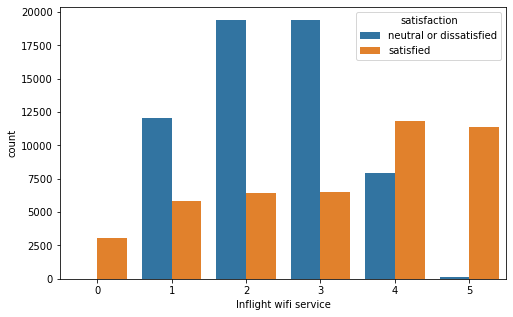

In [27]:
plt.figure(figsize = (8, 5))
sns.countplot('Inflight wifi service', data=train, hue='satisfaction')

###### WE CAN SEE THAT MOST OF THE PASSENGERS HAVE RATED INFLIGHT WIFI SERVICE BETWEEN 2-3, THUS INCREASING THE COUNT OF DISSATISFIED PASSENGERS.

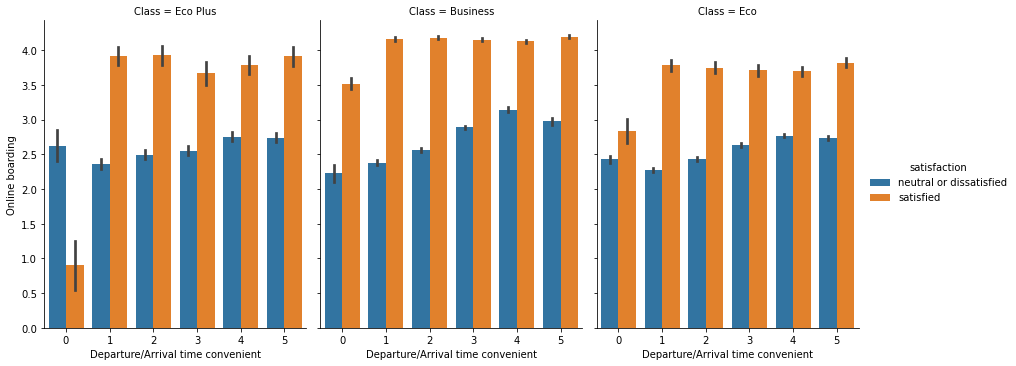

In [28]:
sns.catplot(x='Departure/Arrival time convenient', y='Online boarding', hue="satisfaction", col="Class",
                data = train, kind="bar",  aspect=.8)

###### HERE WE CAN SEE THAT IN ECO PLUS CLASS A LOT OF PEOPLE ARE DISSATISFIED DUE TO POOR DEPARTURE/ ARRIVAL TIME EVEN WHEN ONLINE BOARDING IS GOOD.

<AxesSubplot:xlabel='Ease of Online booking', ylabel='count'>

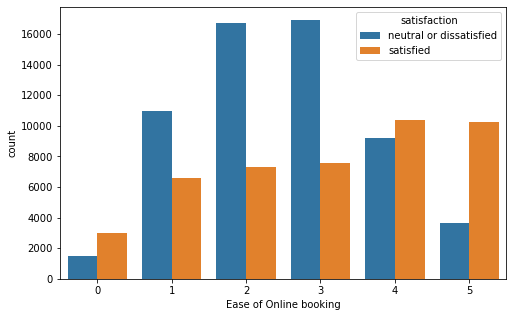

In [29]:
plt.figure(figsize = (8, 5))
sns.countplot('Ease of Online booking', data=train, hue='satisfaction')

###### HIGH NUMBER OF PEOPLE RATED EASE OF ONLINE BOOKING 2-3, THUS LEADING TO HIGH NUMBER OF DISSATISFIED PEOPLE.

<AxesSubplot:xlabel='Food and drink', ylabel='count'>

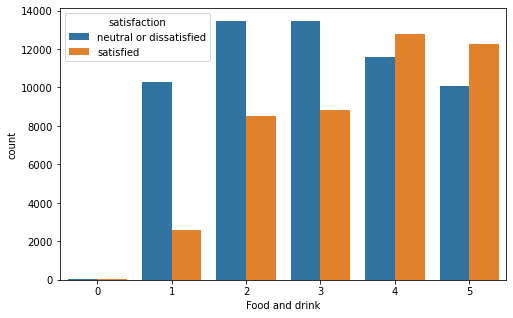

In [30]:
plt.figure(figsize = (8, 5))
sns.countplot('Food and drink', data=train, hue='satisfaction')

##### HUGE COUNT OF PASSENGERS HAVE RATED FOOD AND DRINK AS 2-3, THUS LEADING TO HIGH COUNT OF DISSATISFACTION.

<AxesSubplot:xlabel='Online boarding', ylabel='count'>

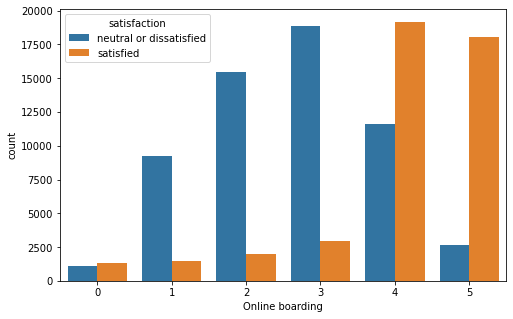

In [31]:
plt.figure(figsize = (8, 5))
sns.countplot('Online boarding', data=train, hue='satisfaction')

###### PASSENEGERS FACING ISSUES IN ONLINE BOARDING OFTEN RESULT IN PASSENGER DISSATISFACTION. A HIGH  NUMBER OF PEOPLE HAVE RATED ONLINE BOARDING AS 1-3.

<AxesSubplot:xlabel='Seat comfort', ylabel='count'>

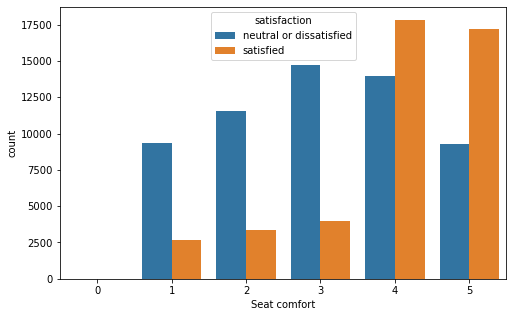

In [32]:
plt.figure(figsize = (8, 5))
sns.countplot('Seat comfort', data=train, hue='satisfaction')

###### MOST OF THE PEOPLE ARE DISSATISFIED WITH SEAT COMFORT. 

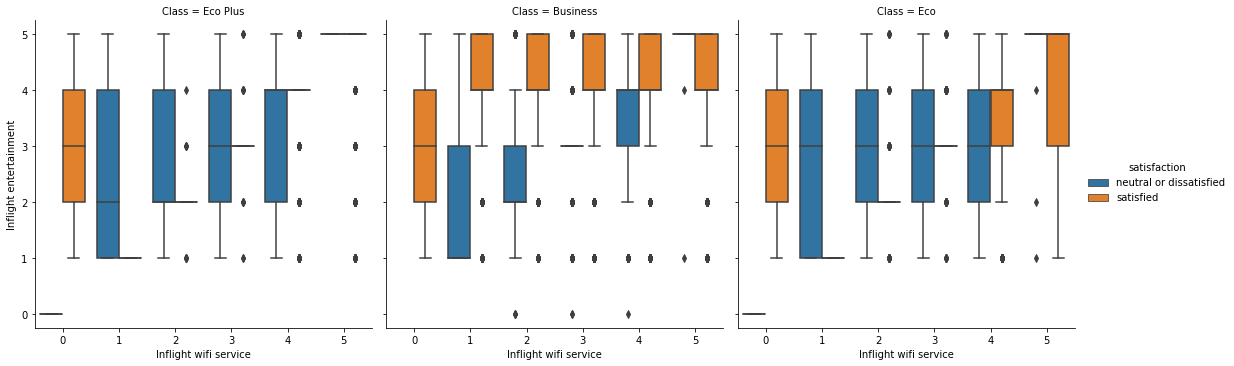

In [33]:
sns.catplot(x='Inflight wifi service', y='Inflight entertainment', hue="satisfaction", col="Class",
            data=train, kind="box")

###### SURPRISING TO FING OUT THAT PASSENGERS IN ECO AND ECO PLUS ARE SATISFIED EVEN WHEN THERE IS NO INFLIGHT WIFI SERVICE BUT SOME INFLIGHT ENTERTAINMENT RATING FROM 2-4. WHILE IN BUSINESS CLASS PASSENGERS ARE ONLY SATISFIED WHEN THE INFLIGHT WIFI SERVICE AND INFLIGHT ENTERTAINMENT IS GOOD (i.e. FROM 4-5)

<AxesSubplot:xlabel='On-board service', ylabel='count'>

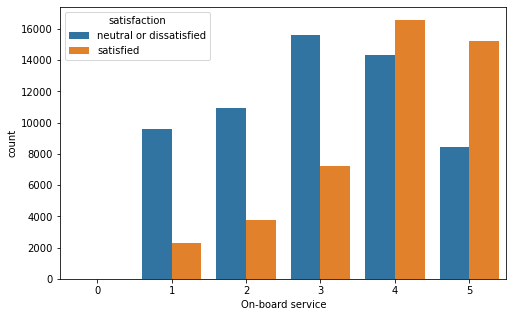

In [34]:
plt.figure(figsize = (8, 5))
sns.countplot('On-board service', data=train, hue='satisfaction')

###### MOST OF THE PEOPLE ARE DISSATISFIED DUE TO POOR ON-BOARD SERVICE AND HAVE GIVEN RATING FROM 1-3

<AxesSubplot:xlabel='Leg room service', ylabel='count'>

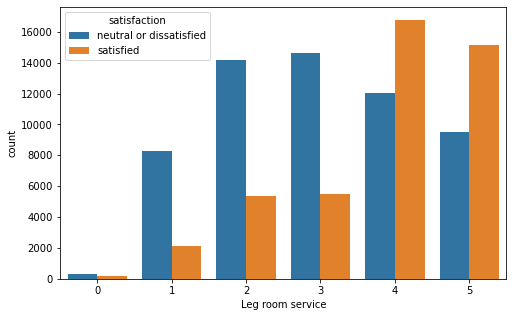

In [35]:
plt.figure(figsize = (8, 5))
sns.countplot('Leg room service', data=train, hue='satisfaction')

###### MOST OF THE PEOPLE ARE DISSATISFIED DUE TO POOR LEG ROOM SERVICE AND HAVE GIVEN RATING FROM 1-3

<AxesSubplot:xlabel='Inflight service', ylabel='count'>

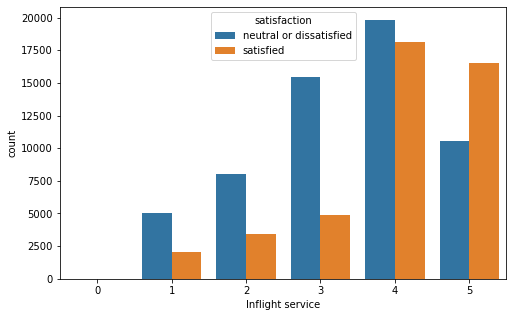

In [36]:
plt.figure(figsize = (8, 5))
sns.countplot('Inflight service', data=train, hue='satisfaction')

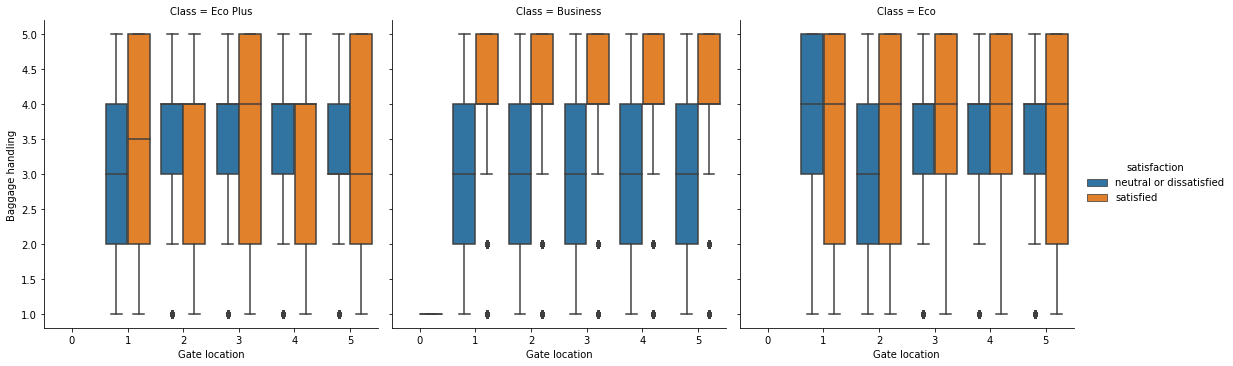

In [37]:
sns.catplot(x='Gate location', y='Baggage handling', hue='satisfaction', col='Class', data=train, kind = 'box')

###### FROM ABOVE PLOT WE CAN SEE THAT IN BUSINESS CLASS PASSENGERS ARE ONLY SATISFIED WHEN THE BAGGAGES ARE HANDLED PROPERLY. IN ECO PLUS AND ECO CLASS MOSTLY BAGGAGES ARE HANDLED IN MEDIOCRE WAY(FROM 2 - 4) WHICH IS LEADING TO PASSENGER DISSATISFACTION.

##### CHECKING FOR CLASS IMBALANCE

In [38]:
print(train.satisfaction.value_counts()/len(train.satisfaction))

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64


###### DATA LOOKS BALANCED

##### CHECKING FOR MUTI-COLLINEARITY

In [39]:
numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

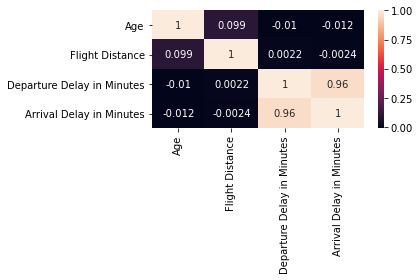

In [40]:
sns.heatmap(train[numeric_columns].corr(), annot=True)
plt.tight_layout()

###### FROM THE HEATMAP WE CAN SEE THAT 'Departure Delay in Minutes' AND ' Arrival Delay in Minutes' COLUMNS HAVE HIGH CO-RELATION BETWEEN THEM. SO, WE NEED TO DROP ONE COLUMN.
###### DROPPING COLUMN 'Departure Delay in Minutes'

In [41]:
train = train.drop(['Departure Delay in Minutes'], axis=1)
test = test.drop(['Departure Delay in Minutes'], axis=1)

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()

In [44]:
train[train.select_dtypes(include = ['object']).columns] = train[train.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [45]:
test[test.select_dtypes(include = ['object']).columns] =test[test.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [46]:
train.head(1)

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,18.0,0


In [47]:
test.head(1)

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,0,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,44.0,1


## SAMPLING

In [48]:
from sklearn.model_selection import train_test_split 

In [49]:
train , valid = train_test_split (train, test_size = .2, random_state = 42)

In [50]:
train.shape

(83123, 21)

In [51]:
valid.shape

(20781, 21)

In [52]:
train_x = train.iloc [ : , 0 : -1] 
train_y = train.iloc [ :, -1]

valid_x = valid.iloc [ : , 0 : -1] 
valid_y = valid.iloc [ :, -1]

In [53]:
test_x = test.iloc [ : , 0 : -1] 
test_y = test.iloc [ :, -1]

In [54]:
train_x.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
20921,0,59,1,1,1046,4,5,4,1,5,4,5,2,2,4,3,5,2,4,3.0
36897,1,40,0,0,752,4,4,4,2,1,4,5,1,4,2,4,3,5,1,29.0
8468,0,65,1,1,383,2,3,2,1,1,2,1,1,5,4,5,5,5,1,0.0
53490,0,70,1,1,2239,3,5,3,4,3,5,4,5,5,3,5,3,5,5,0.0
78687,1,25,0,1,1358,2,2,2,3,1,2,1,1,1,2,3,5,2,1,15.0


In [55]:
train_y.head()

20921    0
36897    0
8468     0
53490    0
78687    0
Name: satisfaction, dtype: int32

In [56]:
valid_x.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
80638,0,26,1,1,861,2,4,2,5,5,2,5,5,5,4,4,3,5,5,0.0
43398,0,22,0,0,393,3,5,5,5,3,3,3,3,1,1,3,2,3,3,16.0
32751,0,59,1,1,196,1,3,1,3,2,3,3,4,4,1,4,3,4,4,34.0
33571,0,32,1,1,1020,2,3,2,4,4,2,4,4,3,2,4,1,4,4,4.0
71287,1,35,0,0,1117,2,2,2,1,2,2,5,2,2,2,3,2,2,2,0.0


In [57]:
valid_y.head()

80638    0
43398    0
32751    0
33571    0
71287    0
Name: satisfaction, dtype: int32

In [58]:
test_x.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
0,0,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,44.0
1,0,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0.0
2,1,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0.0
3,0,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,6.0
4,0,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,20.0


In [59]:
test_y.head()

0    1
1    1
2    0
3    1
4    1
Name: satisfaction, dtype: int32

## MODEL BUILDING

#### LOGISTIC REGRESSION

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
log_reg = LogisticRegression()

In [62]:
log_reg.fit(train_x, train_y)

LogisticRegression()

In [63]:
pred_log_reg = log_reg.predict(valid_x)
pred_log_reg

array([0, 0, 0, ..., 0, 1, 1])

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
tab1 = confusion_matrix(pred_log_reg, valid_y)
tab1

array([[10028,  1670],
       [ 1685,  7398]], dtype=int64)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [67]:
acc_log_reg = accuracy_score(valid_y,pred_log_reg) * 100
acc_log_reg

83.85544487753236

In [68]:
tpr_log_reg = (tab1[1][1])/(tab1[1][1]+tab1[0][1])
tpr_log_reg

0.8158359064843406

In [69]:
fpr_log_reg = (tab1[1][0])/(tab1[1][0]+tab1[0][0])
fpr_log_reg

0.14385725262528815

In [70]:
precision_log_reg = (tab1[1][1])/(tab1[1][1]+tab1[1][0])
precision_log_reg

0.8144886050864252

In [71]:
F1_log_reg = 2 * (precision_log_reg * tpr_log_reg) / (precision_log_reg + tpr_log_reg)
F1_log_reg

0.8151616990799405

In [72]:
from sklearn.metrics import roc_auc_score   
from sklearn.metrics import roc_curve

In [73]:
log_reg_roc_auc = roc_auc_score(pred_log_reg, valid_y)
log_reg_roc_auc

0.8358645795136349

In [74]:
pred_value_proba = log_reg.predict_proba(valid_x)
pred_value_proba = pred_value_proba[:, 1]

In [75]:
fpr, tpr, threshold = roc_curve(valid_y, pred_value_proba)

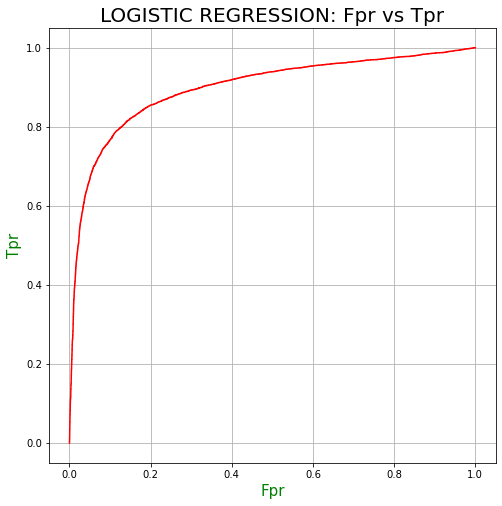

In [76]:
fig = plt.figure(figsize =(8,8))
plt.plot(fpr, tpr, color = 'red')
plt.xlabel('Fpr', color = 'g', size = 15)
plt.ylabel('Tpr', color = 'g', size = 15)
plt.title('LOGISTIC REGRESSION: Fpr vs Tpr', size = 20)
plt.grid()

#### DECISION TREE

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt = DecisionTreeClassifier(criterion= "entropy" )

In [79]:
dt.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy')

In [80]:
pred_dt = dt.predict(valid_x)
pred_dt

array([0, 0, 0, ..., 0, 1, 1])

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
tab_dt = confusion_matrix(pred_dt, valid_y)
tab_dt

array([[11191,   527],
       [  522,  8541]], dtype=int64)

In [83]:
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(pred_dt, valid_y) * 100
acc_dt

94.95211972474857

In [84]:
tpr_dt = (tab_dt[1][1])/(tab_dt[1][1]+tab_dt[0][1])
tpr_dt

0.9418835465372739

In [85]:
fpr_dt = (tab_dt[1][0])/(tab_dt[1][0]+tab_dt[0][0])
fpr_dt

0.04456586698540084

In [86]:
precision_dt = (tab_dt[1][1])/(tab_dt[1][1]+tab_dt[1][0])
precision_dt

0.94240317775571

In [87]:
F1_dt = 2 * (precision_dt * tpr_dt) / (precision_dt + tpr_dt)
F1_dt

0.9421432904969389

In [88]:
from sklearn.metrics import roc_auc_score   
from sklearn.metrics import roc_curve

In [89]:
dt_roc_auc = roc_auc_score(pred_dt, valid_y)
dt_roc_auc

0.9487148163910825

In [90]:
pred_value_proba = dt.predict_proba(valid_x)
pred_value_proba = pred_value_proba[:, 1]

In [91]:
fpr, tpr, threshold = roc_curve(valid_y, pred_value_proba)

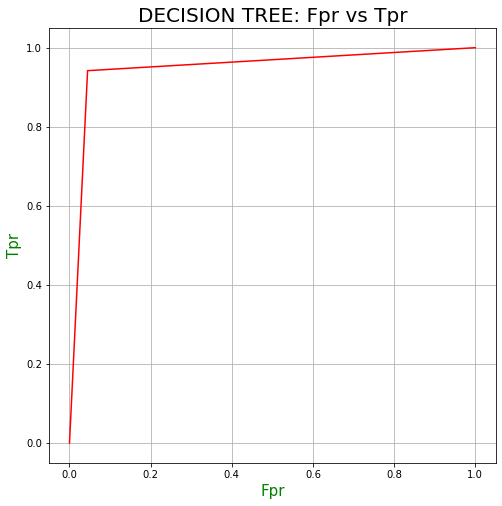

In [92]:
fig = plt.figure(figsize =(8,8))
plt.plot(fpr, tpr, color = 'red')
plt.xlabel('Fpr', color = 'g', size = 15)
plt.ylabel('Tpr', color = 'g', size = 15)
plt.title('DECISION TREE: Fpr vs Tpr', size = 20)
plt.grid()

#### RANDOM FOREST

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc = RandomForestClassifier(n_estimators=150, criterion='entropy') 

In [95]:
rfc.fit(train_x, train_y)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [96]:
pred_rfc = rfc.predict(valid_x)
pred_rfc

array([0, 0, 0, ..., 0, 1, 1])

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
tab_rfc = confusion_matrix(pred_rfc, valid_y)
tab_rfc

array([[11495,   538],
       [  218,  8530]], dtype=int64)

In [99]:
from sklearn.metrics import accuracy_score
acc_rfc = accuracy_score(pred_rfc, valid_y) * 100
acc_rfc

96.3620614984842

In [100]:
tpr_rfc = (tab_rfc[1][1])/(tab_rfc[1][1]+tab_rfc[0][1])
tpr_rfc

0.9406704896338773

In [101]:
fpr_rfc = (tab_rfc[1][0])/(tab_rfc[1][0]+tab_rfc[0][0])
fpr_rfc

0.018611798855971997

In [102]:
precision_rfc = (tab_rfc[1][1])/(tab_rfc[1][1]+tab_rfc[1][0])
precision_rfc

0.9750800182898949

In [103]:
F1_rfc = 2 * (precision_rfc * tpr_rfc) / (precision_rfc + tpr_rfc)
F1_rfc

0.9575662325999101

In [104]:
from sklearn.metrics import roc_auc_score   
from sklearn.metrics import roc_curve

In [105]:
rfc_roc_auc = roc_auc_score(pred_rfc, valid_y)
rfc_roc_auc

0.9651848192504906

In [106]:
pred_value_proba = rfc.predict_proba(valid_x)
pred_value_proba = pred_value_proba[:, 1]

In [107]:
fpr, tpr, threshold = roc_curve(valid_y, pred_value_proba)

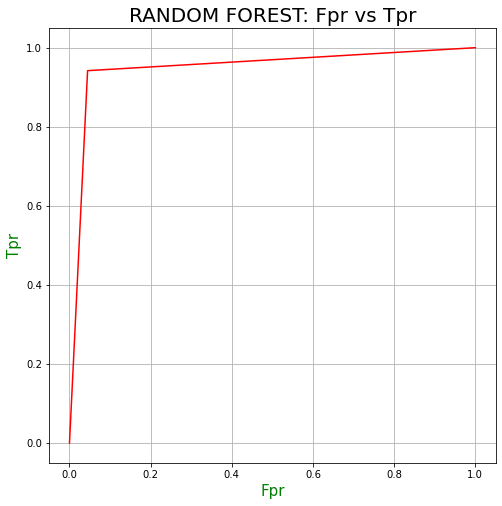

In [108]:
fig = plt.figure(figsize =(8,8))
plt.plot(fpr, tpr, color = 'red')
plt.xlabel('Fpr', color = 'g', size = 15)
plt.ylabel('Tpr', color = 'g', size = 15)
plt.title('RANDOM FOREST: Fpr vs Tpr', size = 20)
plt.grid()

#### NAIVE BAYES

In [109]:
from sklearn.naive_bayes import MultinomialNB

In [110]:
nb = MultinomialNB()

In [111]:
nb.fit(train_x, train_y)

MultinomialNB()

In [112]:
pred_nb = nb.predict(valid_x)
pred_nb

array([0, 0, 0, ..., 1, 1, 0])

In [113]:
from sklearn.metrics import confusion_matrix

In [114]:
tab_nb = confusion_matrix(pred_nb, valid_y)
tab_nb

array([[7870, 4043],
       [3843, 5025]], dtype=int64)

In [115]:
acc_nb = tab_nb.diagonal().sum() / tab_nb.sum() * 100
acc_nb

62.051874308262356

In [116]:
tpr_nb = (tab_nb[1][1])/(tab_nb[1][1]+tab_nb[0][1])
tpr_nb

0.55414644905161

In [117]:
fpr_nb = (tab_nb[1][0])/(tab_nb[1][0]+tab_nb[0][0])
fpr_nb

0.32809698625458894

In [118]:
precision_nb = (tab_nb[1][1])/(tab_nb[1][1]+tab_nb[1][0])
precision_nb

0.5666441136671178

In [119]:
F1_nb = 2 * (precision_nb * tpr_nb) / (precision_nb + tpr_nb)
F1_nb

0.5603256021409455

In [120]:
from sklearn.metrics import roc_auc_score   
from sklearn.metrics import roc_curve

In [121]:
nb_roc_auc = roc_auc_score(pred_nb, valid_y)
nb_roc_auc

0.6136334813278089

In [122]:
pred_value_proba = nb.predict_proba(valid_x)
pred_value_proba = pred_value_proba[:, 1]

In [123]:
fpr, tpr, threshold = roc_curve(valid_y, pred_value_proba)

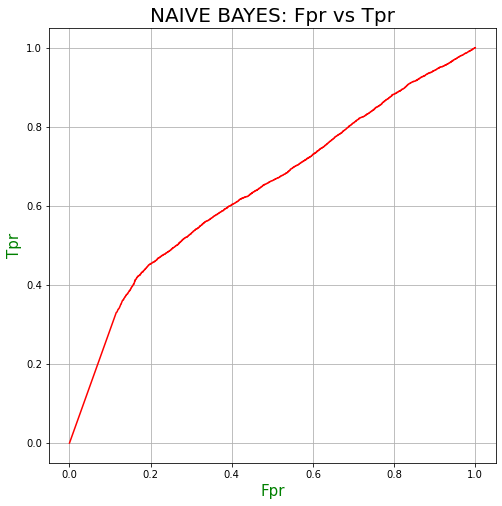

In [124]:
fig = plt.figure(figsize =(8,8))
plt.plot(fpr, tpr, color = 'red')
plt.xlabel('Fpr', color = 'g', size = 15)
plt.ylabel('Tpr', color = 'g', size = 15)
plt.title('NAIVE BAYES: Fpr vs Tpr', size = 20)
plt.grid()

#### KNN

In [125]:
acc = []
for i in range(1, 150):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x, train_y)
    pred_knn = knn.predict(valid_x)  
    from sklearn.metrics import confusion_matrix
    tab_knn = confusion_matrix(pred_knn,valid_y)
    Acc = (tab_knn[0][0] + tab_knn[1][1])/tab_knn.sum() * 100
    acc.append(Acc)

print("tab_knn: ",tab_knn)
print("acc: ",acc)

tab_knn:  [[9606 4119]
 [2107 4949]]
acc:  [74.23608103556133, 74.41412829026515, 76.19941292526828, 76.09835907800394, 76.28603050863771, 75.85775467975554, 76.29084259660267, 75.8192579760358, 75.92031182330014, 75.58827775371734, 75.74226456859631, 75.3524854434339, 75.49203599441799, 75.22737115634473, 75.46797555459314, 75.17443818873008, 75.34286126750396, 74.90977335065685, 75.00601510995621, 74.736538183918, 74.81834367932247, 74.58255136903902, 74.91458543862181, 74.47668543380973, 74.64992060054858, 74.24089312352629, 74.2697656513161, 73.99066454934797, 74.11577883643713, 73.85592608632886, 73.91367114190848, 73.7452480631346, 73.73081179923969, 73.59607333622058, 73.66825465569511, 73.42765025744671, 73.6393821279053, 73.22554256291805, 73.39396564169192, 73.10042827582888, 73.1437370675136, 72.95125354891488, 73.08599201193398, 73.05711948414417, 73.06674366007411, 72.782830470141, 72.91275684519512, 72.60959530340214, 72.65290409508685, 72.44117222462827, 72.5807227756123

In [126]:
for i in range(1, len(acc)):
    if acc[i] == max(acc):
        print(i)

6


##### GRAPHICAL REPRESENTATION
##### DECIDE FROM THE GRAPH WHICH IS THE VALUE OF K MORE SUITABLE

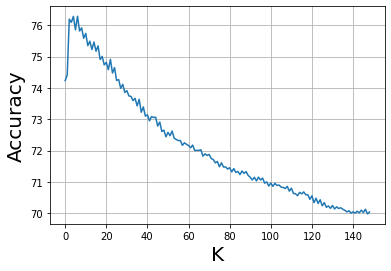

In [127]:
plt.plot(acc)
plt.xlabel("K", size = 20)
plt.ylabel("Accuracy", size = 20)
plt.grid()
plt.show()

###### HERE THE GRAPHICAL REPRESENTATION CLEARLY SHOWS THAT THE GRAPH IS NOT STABLE AND ALSO ACCURACY IS LESS AS COMPARED TO OTHER ALGORITHMS. SO, I WILL NOT BUILD THE MODEL USING KNN.

#### SVM

In [125]:
from sklearn.svm import SVC

In [126]:
svc = SVC(kernel = 'sigmoid', class_weight = 'balanced')

In [127]:
svc.fit(train_x, train_y)

SVC(class_weight='balanced', kernel='sigmoid')

In [128]:
pred_svm = svc.predict(valid_x)
pred_svm

array([1, 0, 0, ..., 1, 0, 0])

In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
tab_svm = confusion_matrix(pred_svm, valid_y)
tab_svm

array([[4918, 5313],
       [6795, 3755]], dtype=int64)

In [131]:
acc_svm = tab_svm.diagonal().sum() / tab_svm.sum() * 100
acc_svm

41.73523892016746

In [132]:
tpr_svm = (tab_svm[1][1])/(tab_svm[1][1]+tab_svm[0][1])
tpr_svm

0.41409351565946184

In [133]:
fpr_svm = (tab_svm[1][0])/(tab_svm[1][0]+tab_svm[0][0])
fpr_svm

0.5801246478272005

In [134]:
precision_svm = (tab_svm[1][1])/(tab_svm[1][1]+tab_svm[1][0])
precision_svm

0.35592417061611376

In [135]:
F1_svm = 2 * (precision_svm * tpr_svm) / (precision_svm + tpr_svm)
F1_svm

0.38281170353756755

In [136]:
from sklearn.metrics import roc_auc_score   
from sklearn.metrics import roc_curve

In [137]:
svm_roc_auc = roc_auc_score(pred_svm, valid_y)
svm_roc_auc

0.4183100473841003

#### ADABOOST

In [138]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [139]:
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(dt , n_estimators = 20, learning_rate = 0.5)

In [140]:
ada.fit(train_x , train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.5,
                   n_estimators=20)

In [141]:
pred_ada = ada.predict(valid_x)
pred_ada

array([0, 0, 0, ..., 0, 1, 1])

In [142]:
tab_ada = confusion_matrix(pred_ada , valid_y)
tab_ada

array([[11170,   526],
       [  543,  8542]], dtype=int64)

In [143]:
acc_ada = accuracy_score(pred_ada , valid_y)*100
acc_ada

94.85587796544921

In [144]:
tpr_ada = (tab_ada[1][1])/(tab_ada[1][1]+tab_ada[0][1])
tpr_ada

0.9419938244375827

In [145]:
fpr_ada = (tab_ada[1][0])/(tab_ada[1][0]+tab_ada[0][0])
fpr_ada

0.046358746691710064

In [146]:
precision_ada = (tab_ada[1][1])/(tab_ada[1][1]+tab_ada[1][0])
precision_ada

0.940231150247661

In [147]:
F1_ada = 2 * (precision_ada * tpr_ada) / (precision_ada + tpr_ada)
F1_ada

0.9411116619842451

In [148]:
from sklearn.metrics import roc_auc_score   
from sklearn.metrics import roc_curve

In [149]:
ada_roc_auc = roc_auc_score(pred_ada, valid_y)
ada_roc_auc

0.9476292550143914

In [150]:
pred_value_proba = ada.predict_proba(valid_x)
pred_value_proba = pred_value_proba[:, 1]

In [151]:
fpr, tpr, threshold = roc_curve(valid_y, pred_value_proba)

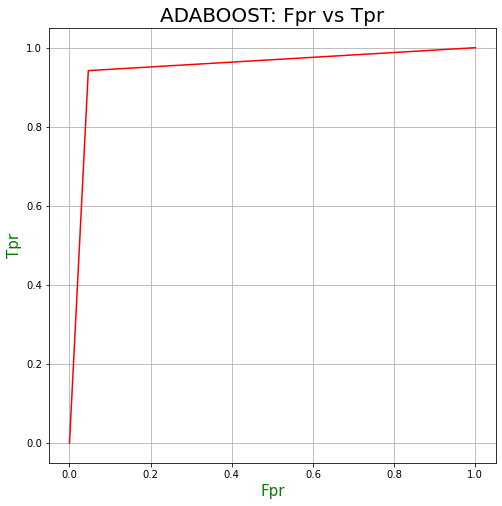

In [152]:
fig = plt.figure(figsize =(8,8))
plt.plot(fpr, tpr, color = 'red')
plt.xlabel('Fpr', color = 'g', size = 15)
plt.ylabel('Tpr', color = 'g', size = 15)
plt.title('ADABOOST: Fpr vs Tpr', size = 20)
plt.grid()

#### FEATURE IMPORTANCE

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
rf = RandomForestClassifier()

In [155]:
rf.fit(train_x, train_y)

RandomForestClassifier()

In [156]:
rf.feature_importances_

array([0.03596522, 0.0326434 , 0.1003219 , 0.10668709, 0.03718951,
       0.14964856, 0.01561848, 0.03908117, 0.01631655, 0.01234163,
       0.16764687, 0.04513563, 0.06121556, 0.03006054, 0.04136288,
       0.02580594, 0.02311462, 0.02225807, 0.02291435, 0.01467202])

In [157]:
train_x.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Arrival Delay in Minutes'],
      dtype='object')

In [158]:
## create dataframe to compare the feature importances with respected columns
feature_importance = pd.DataFrame({"Features" : train_x.columns,
                                   "Score"    : rf.feature_importances_})
feature_importance.sort_values("Score", ascending = False)  ## arrange columns in descending order

,Features,Score
10,Online boarding,0.167647
5,Inflight wifi service,0.149649
3,Class,0.106687
2,Type of Travel,0.100322
12,Inflight entertainment,0.061216
11,Seat comfort,0.045136
14,Leg room service,0.041363
7,Ease of Online booking,0.039081
4,Flight Distance,0.037190
0,Customer Type,0.035965


Text(0.5, 1.0, 'Feature Importance Plot')

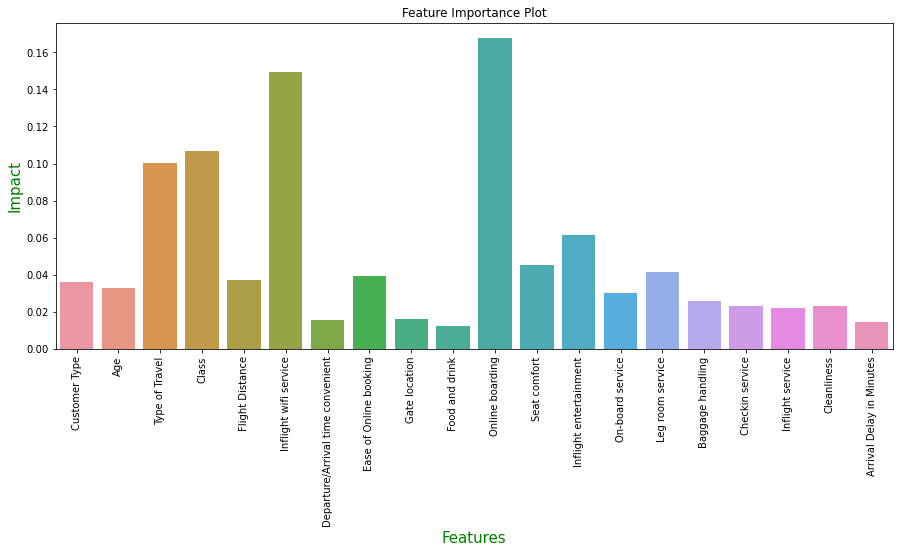

In [159]:
plt.figure(figsize = (15, 6))
sns.barplot(y = rf.feature_importances_,x = train_x.columns.values)
plt.xlabel('Features', color = 'g', size = 15)
plt.ylabel('Impact', color = 'g', size = 15)
plt.xticks(rotation = 90)
plt.title('Feature Importance Plot')

###### HERE WE CAN SEE THAT, THE TOP DECIDING FACTORS OF PASSENGER SATISFACTION ARE:
###### 1) ONLINE BOARDING
###### 2) INFLIGHT WIFI SERVICE
###### 3) CLASS
###### 4) TYPE OF TRAVEL
###### 5) INFLIGHT ENTERTAINMENT
###### SO, THE COMPANY SHOULD MAINLY FOCUS ON IMPROVING THESE SERVICES IN ORDER TO ACHIEVE PASSENGER SATISFACTION AND BECOME SUCCESFUL IN AIRLINE INDUSTRY.

## MODEL COMPARISON

In [160]:
performance_matrices = pd.DataFrame({'Algorithm' : ['Logistic Regression' , 'Decision Tree' , 'Random Forest' ,
                                                   'Naive Bayes' , 'SVM', 'Adaboost'] , 
            'Accuracy' : [acc_log_reg , acc_dt , acc_rfc , acc_nb , acc_svm, acc_ada] , 
            'Tpr' : [tpr_log_reg , tpr_dt , tpr_rfc , tpr_nb, tpr_svm, tpr_ada] , 
            'Fpr' : [fpr_log_reg , fpr_dt , fpr_rfc, fpr_nb , fpr_svm, fpr_ada] , 
            'Precision' : [precision_log_reg , precision_dt , precision_rfc , precision_nb, precision_svm, precision_ada],
            'F1 Score'  : [F1_log_reg, F1_dt, F1_rfc, F1_nb, F1_svm, F1_ada],
            'AUROC'   : [log_reg_roc_auc, dt_roc_auc, rfc_roc_auc, nb_roc_auc, svm_roc_auc, ada_roc_auc]})
performance_matrices

,Algorithm,Accuracy,Tpr,Fpr,Precision,F1 Score,AUROC
0,Logistic Regression,83.855445,0.815836,0.143857,0.814489,0.815162,0.835865
1,Decision Tree,94.952120,0.941884,0.044566,0.942403,0.942143,0.948715
2,Random Forest,96.362061,0.940670,0.018612,0.975080,0.957566,0.965185
3,Naive Bayes,62.051874,0.554146,0.328097,0.566644,0.560326,0.613633
4,SVM,41.735239,0.414094,0.580125,0.355924,0.382812,0.418310
5,Adaboost,94.855878,0.941994,0.046359,0.940231,0.941112,0.947629


###### AFTER COMPARING ABOVE PERFORMANCE MATRICES, WE CAN SEE THAT DECISION TREE, RANDOM FOREST AND ADABOOST GIVE BEST PERFORMANCE. 
###### THESE THREE ALGORITHMS HAVE HIGH ACCURACY, HIGH TPR, LOW FPR, BEST PRECISION, HIGH F1 SCORE AND GOOD AUROC SCORE.
###### FOR AIRLINE PASSENGER DATA, COMAPNY SHOULD MAINLY FOCUS ON FALSE POSITIVE (i.e. DISSATISFIED PASSENGERS PREDICTED AS SATISFIED PASSENGERS AS THE COMPANY'S AIM IS TO IMPROVE THEIR SERVICES. 
###### HERE RANDOM FOREST GIVES BEST PRECISION SCORE AMONG ALL ALGORITHMS AND ALSO BEST SCORES IN OTHER PARAMETERS.
##### SO, I WOULD CHOOSE RANDOM FOREST FOR THIS DATASET.

## PREDICTION

###### PREDICTING ON THE TEST DATASET WITH THE BEST SELECTED MODEL (RANDOM FOREST)

In [161]:
predictions_rfc = rfc.predict(test_x)
predictions_rfc

array([1, 1, 0, ..., 0, 1, 0])

In [162]:
pred_test = le.inverse_transform(predictions_rfc)
pred_test

array(['satisfied', 'satisfied', 'neutral or dissatisfied', ...,
       'neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied'],
      dtype=object)

In [163]:
pred_test = pd.DataFrame(pred_test)
pred_test.head()

,0
0,satisfied
1,satisfied
2,neutral or dissatisfied
3,satisfied
4,neutral or dissatisfied
